<a href="https://colab.research.google.com/github/alexandre-braga/DCC190/blob/main/DCC_190_Lista_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Questão 1 - Difusão Reação Transiente



\begin{eqnarray}
 \dfrac{du}{dt} - \dfrac{d^2 u}{d x^2} - \dfrac{8}{δ}u^2(1-u) = 0,  \ \ \ \
 (x,t) \in [a,b] \times [0,T].\\
\end{eqnarray}
\begin{eqnarray}
 u(a,t) = 1 .\\ u(b,t) = 0 .\\ u(x,0) = ϕ(x) .\\ 
\end{eqnarray}


Solução Exata
$$
u(x,t)= \dfrac{1}{2} [ 1 - tanh\dfrac{x - 2t/δ}{δ} ]
$$
Considere :
$$
δ = 2 \\
a = -10 \\
b = 90 \\
T = 4
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def TDMASolve(a, b, c, d):
  nmax = len(d)#n em números é linhas

  # Modifica o primeiro coeficiente de cada linha
  c[0] /= b[0] #Risco de divisão por zero.
  d[0] /= b[0]

  for i in range(1, nmax):
    ptemp = b[i] - (a[i] * c[i-1])
    c[i] /= ptemp
    d[i] = (d[i] - a[i] * d[i-1])/ptemp

  #Substituição de volta
  x = [0 for i in range(nmax)]
  x[-1] = d[-1]
  for i in range(-2,-nmax-1,-1):
    x[i] = d[i] - c[i] * x[i+1]
  return x

In [ ]:
def exata(x,t,delta):
  return 1/2 * (1 - np.tanh((x - (2*t)/delta ) / delta) )
 
def f(x,t,delta):
  return 0

def phix(x):
  return 1/2 * (1 - np.tanh(x/2) )

##Implícito

Problema modelo:
$$
\dfrac{\partial u}{\partial t} - \varepsilon\dfrac{\partial^2 u}{\partial x^2} - \dfrac{8}{\delta^2}u^2 + \dfrac{8}{\delta^2}u^3 = 0
$$
$$
\dfrac{\partial u}{\partial t} - \varepsilon\dfrac{\partial^2 u}{\partial x^2} = \dfrac{8}{\delta^2}u^2 - \dfrac{8}{\delta^2}u^3
$$
Método Implícito
$$
u^{n+1}_j - \sigma (u^{n+1}_{j+1} - 2u^{n+1}_j + u^{n+1}_{j-1})  =  u^{n}_{j} + Δt(  \dfrac{8}{\delta^2}u^{2n}_{j} -  \dfrac{8}{\delta^2}u^{3n}_{j})
$$
onde 
$$
\sigma = \dfrac{\varepsilon \Delta t}{h^2}
$$

###Implícito h1

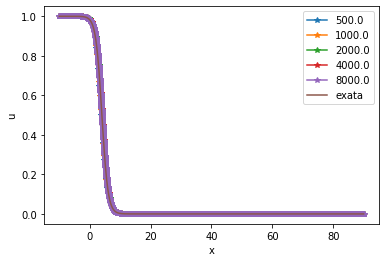

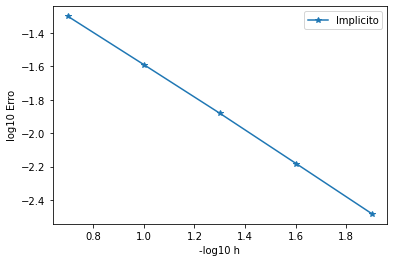

Erro:  [0.05005529 0.02569322 0.01312916 0.00657997 0.00328641]
Implicito 0.9822342919139414


In [ ]:
er = 5
erroImplicitoh1 = np.zeros(er)
refin = np.zeros(er)
vetorNel = np.zeros(er)

for j in range(er):

  nel = 500*(2**j)
  # dominio espacial
  xi = -10
  xf = 90
  # espaçamento entre os elementos
  h = (xf-xi)/nel
  h2 = h*h

  #dominio temporal
  ti = 0
  tf = 4
  #espaçamento temporal
  dt = h

  #coeficiente difusivo
  eps = 1

  sigma = eps*dt/h2
  delta = 2

  x = np.linspace(xi,xf,nel+1)
  u = np.zeros(nel+1)

  #condicao inicial
  u = phix(x)

  t = ti
  while(t < tf):

  #condicoes de contorno de Dirichlet
    u[0] = 1.
    u[nel] = 0.

    #construcao da matriz
    a = -sigma*np.ones(nel-1)
    b = (1 + 2*sigma)*np.ones(nel-1)
    b[nel-2] = (1 + sigma)
    c = -sigma*np.ones(nel-1)
    c[nel-2] = 0
    # construcao do vetor fonte 
    u2 = np.zeros(nel+1)
    u2 = np.power(u,2)
    u3 = np.zeros(nel+1)
    u3 = np.power(u,3)
    delta2 = delta*delta;
    d = f(np.linspace(xi+h,xf-h,nel-1),t,delta) + u[1:nel] + dt*( (8/delta2)*(u2[1:nel] - u3[1:nel]) )
    # contribuicao das condicoes de contorno no termo fonte 
    d[0] = d[0] + sigma*u[0] 
    d[nel-2] = d[nel-2] + sigma*u[nel]

    u[1:nel] = TDMASolve(a,b,c,d)

    t = t + dt

  refin[j] = h
  vetorNel[j] = nel
  x = np.linspace(xi,xf,nel+1)
  xx = np.linspace(xi,xf,nel+1)
  exataxx = exata(xx,t,delta)
  plt.plot(x,u,"-*")

  erroImplicitoh1[j] = np.max(np.abs(exataxx - u))


plt.ylabel("u")
plt.xlabel("x")
plt.plot(xx,exataxx)
plt.legend([vetorNel[0],vetorNel[1],vetorNel[2],vetorNel[3],vetorNel[4],"exata"])
plt.show()

plt.clf()
plt.plot(-np.log10(refin),np.log10(erroImplicitoh1),'-*')
plt.legend(["Implicito"])
plt.ylabel("log10 Erro")
plt.xlabel("-log10 h")
plt.show()
print("Erro: ", erroImplicitoh1)
print("Implicito", (np.log10(erroImplicitoh1[er-1])-np.log10(erroImplicitoh1[0]))/(np.log10(refin[er-1])-np.log10(refin[0])))

###Implícito h2

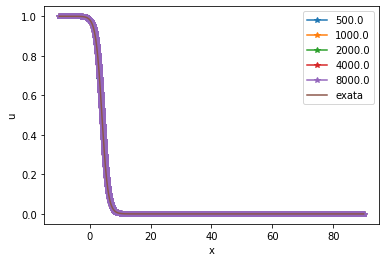

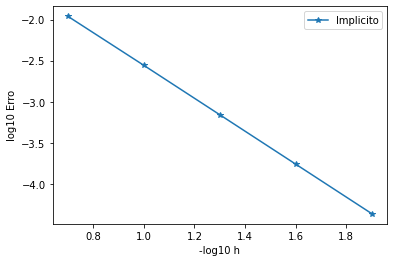

Erro:  [1.09584513e-02 2.77047130e-03 6.93278281e-04 1.73360729e-04
 4.33427528e-05]
Implicito 1.9955093543856774


In [ ]:
er = 5
erroImplicito = np.zeros(er)
refin = np.zeros(er)
vetorNel = np.zeros(er)

for j in range(er):

  nel = 500*(2**j)
  # dominio espacial
  xi = -10
  xf = 90
  # espaçamento entre os elementos
  h = (xf-xi)/nel
  h2 = h*h

  #dominio temporal
  ti = 0
  tf = 4
  #espaçamento temporal
  dt = h2

  #coeficiente difusivo
  eps = 1

  sigma = eps*dt/h2
  delta = 2

  x = np.linspace(xi,xf,nel+1)
  u = np.zeros(nel+1)

  #condicao inicial
  u = phix(x)

  t = ti
  while(t < tf):

  #condicoes de contorno de Dirichlet
    u[0] = 1.
    u[nel] = 0.

    #construcao da matriz
    a = -sigma*np.ones(nel-1)
    b = (1 + 2*sigma)*np.ones(nel-1)
    b[nel-2] = (1 + sigma)
    c = -sigma*np.ones(nel-1)
    c[nel-2] = 0
    # construcao do vetor fonte 
    u2 = np.zeros(nel+1)
    u2 = np.power(u,2)
    u3 = np.zeros(nel+1)
    u3 = np.power(u,3)
    delta2 = delta*delta;
    d = f(np.linspace(xi+h,xf-h,nel-1),t,delta) + u[1:nel] + dt*( (8/delta2)*(u2[1:nel] - u3[1:nel]) )
    # contribuicao das condicoes de contorno no termo fonte 
    d[0] = d[0] + sigma*u[0] 
    d[nel-2] = d[nel-2] + sigma*u[nel]

    u[1:nel] = TDMASolve(a,b,c,d)

    t = t + dt

  refin[j] = h
  vetorNel[j] = nel
  x = np.linspace(xi,xf,nel+1)
  xx = np.linspace(xi,xf,nel+1)
  exataxx = exata(xx,t,delta)
  plt.plot(x,u,"-*")

  erroImplicito[j] = np.max(np.abs(exataxx - u))


plt.ylabel("u")
plt.xlabel("x")
plt.plot(xx,exataxx)
plt.legend([vetorNel[0],vetorNel[1],vetorNel[2],vetorNel[3],vetorNel[4],"exata"])
plt.show()

plt.clf()
plt.plot(-np.log10(refin),np.log10(erroImplicito),'-*')
plt.legend(["Implicito"])
plt.ylabel("log10 Erro")
plt.xlabel("-log10 h")
plt.show()
print("Erro: ", erroImplicito)
print("Implicito", (np.log10(erroImplicito[er-1])-np.log10(erroImplicito[0]))/(np.log10(refin[er-1])-np.log10(refin[0])))

##Crank-Nicolson

$$
\dfrac{\partial u}{\partial t} - \varepsilon\dfrac{\partial^2 u}{\partial x^2} = \dfrac{8}{\delta^2}u^2 - \dfrac{8}{\delta^2}u^3
$$
Método Crank-Nicolson
$$
u^{n+1}_j - \dfrac{\sigma}{2} (u^{n+1}_{j+1} - 2u^{n+1}_j + u^{n+1}_{j-1})  =  u^{n}_{j} +  \dfrac{\sigma}{2} (u^{n}_{j+1} - 2u^{n}_j + u^{n}_{j-1})  + Δt(  \dfrac{8}{\delta^2}u^{2n}_{j} -  \dfrac{8}{\delta^2}u^{3n}_{j})
$$
onde 
$$
\sigma = \dfrac{\varepsilon \Delta t}{h^2}
$$

tf:  4
dt:  0.2
tf:  4
dt:  0.1
tf:  4
dt:  0.05
tf:  4
dt:  0.025
tf:  4
dt:  0.0125


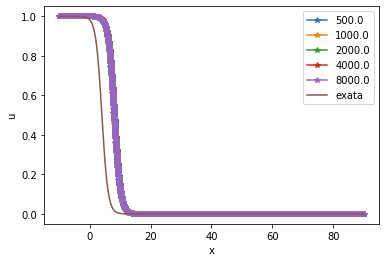

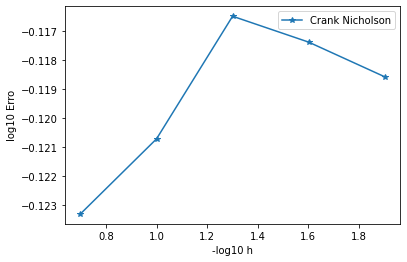

Erro: [0.75281819 0.75732412 0.7647497  0.76317642 0.76107328]
Crank Nicholson -0.003933471562258907


In [ ]:
er = 5
erroCN = np.zeros(er)
refin = np.zeros(er)
vetorNel = np.zeros(er)

for j in range(er):

  nel = 500*(2**j)

  # dominio espacial5
  xi = -10
  xf = 90
  # espaçamento entre os elementos
  h = (xf-xi)/nel
  h2 = h*h

  #dominio temporal
  ti = 0
  tf = 4
  #espaçamento temporal
  dt = h

  #coeficiente difusivo
  eps = 1

  sigma = (eps*dt)/(h2)
  delta = 2
  delta2 = delta*delta;

  x = np.linspace(xi,xf,nel+1)
  u = np.zeros(nel+1)

  #condicao inicial
  u = phix(x)

  t = ti
  while(t < tf):

  #condicoes de contorno de Dirichlet
    u[0] = exata(x[0],t,delta)
    u[nel] = exata(x[nel],t,delta)

    #construcao da matriz
    a = - sigma/2*np.ones(nel-1)
    b = (1 + 2*sigma/2)*np.ones(nel-1)
    c = - sigma/2*np.ones(nel-1)
    d = np.zeros(nel-1)
    u2 = np.zeros(nel+1)
    u2 = np.power(u,2)
    u3 = np.zeros(nel+1)
    u3 = np.power(u,3)

    for i in range(1,nel-2):
      d[i] = sigma/2*u[i-1] + (1-2*sigma/2)*u[i] + sigma/2*u[i+1] +  (dt)*( (8/delta2)*u2[i]*(1 -  u[i]) )
    d[0] = 1
    d[0] =  d[0] + sigma/2*u[0]
    d[nel-2] = d[nel-2] + sigma/2*u[nel]
    u[1:nel] = TDMASolve(a,b,c,d)

    t = t + dt

  refin[j] = h
  vetorNel[j] = nel
  x = np.linspace(xi,xf,nel+1)
  xx = np.linspace(xi,xf,nel+1)
  exataxx = exata(xx,t,delta)
  plt.plot(x,u,"-*")

  erroCN[j] = np.max(np.abs(exataxx - u))

  print("tf: ", tf)
  print("dt: ", dt)

plt.ylabel("u")
plt.xlabel("x")
plt.plot(xx,exataxx)
plt.legend([vetorNel[0],vetorNel[1],vetorNel[2],vetorNel[3],vetorNel[4],"exata"])
plt.show()
plt.clf()


plt.plot(-np.log10(refin),np.log10(erroCN),'-*')
plt.legend(["Crank Nicholson"])
plt.ylabel("log10 Erro")
plt.xlabel("-log10 h")
plt.show()
print("Erro:", erroCN)
print("Crank Nicholson", (np.log10(erroCN[er-1])-np.log10(erroCN[0]))/(np.log10(refin[er-1])-np.log10(refin[0])))

###Matrizes

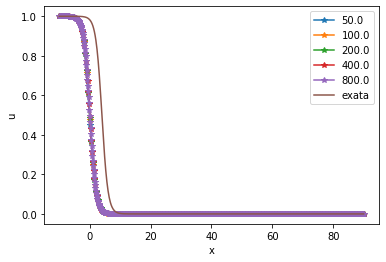

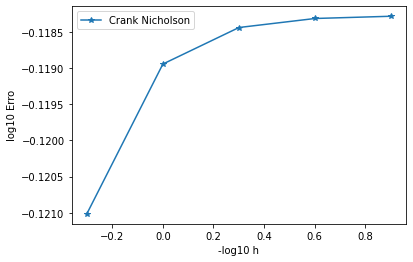

Erro: [0.7568047  0.76041969 0.76130341 0.76152183 0.76157612]
Crank Nicholson -0.002266799338120162


In [ ]:
er = 5
erroCN = np.zeros(er)
refin = np.zeros(er)
vetorNel = np.zeros(er)

for j in range(er):

  nel = 50*(2**j)

  # dominio espacial
  xi = -10
  xf = 90
  # espaçamento entre os elementos
  h = (xf-xi)/nel
  h2 = h*h

  #dominio temporal
  ti = 0
  tf = 4
  #espaçamento temporal
  dt = h/2


  #coeficiente difusivo
  eps = 1

  sigma = (eps*dt)/(2*h2)
  delta = 2
  delta2 = delta*delta;

  x = np.linspace(xi,xf,nel)
  u = np.zeros(nel)

  #condicao inicial
  u = phix(x)

  t = ti
  while(t < tf):

  #condicoes de contorno de Dirichlet
    u[0] = exata(x[0],t,delta)
    u[nel-1] = exata(x[nel-1],t,delta)

    #construcao da matriz
    #A*U(N+1) = B*U(N) + f(N)
    A = np.diagflat([-sigma for i in range(nel-1)], -1) +\
        np.diagflat([1.+sigma]+[1.+2.*sigma for i in range(nel-2)]+[1.+sigma]) +\
        np.diagflat([-sigma for i in range(nel-1)], 1)

    B = np.diagflat([sigma for i in range(nel-1)], -1) +\
        np.diagflat([1.-sigma]+[1.-2.*sigma for i in range(nel-2)]+[1.-sigma]) +\
        np.diagflat([sigma for i in range(nel-1)], 1)
    
    f = np.zeros(nel)
    u2 = np.zeros(nel)
    u2 = np.power(u,2)
    u3 = np.zeros(nel)
    u3 = np.power(u,3)
    for i in range(1,nel-2):
      f[i] = (dt)*( (8/delta2)*(u2[i] -  u3[i]) )
    f[0] =  sigma*u[0]
    f[nel-2] = sigma*u[nel-1]
    np.linalg.solve(A, B.dot(u) + f)

    t = t + dt

  refin[j] = h
  vetorNel[j] = nel
  x = np.linspace(xi,xf,nel)
  xx = np.linspace(xi,xf,nel)
  exataxx = exata(xx,t,delta)
  plt.plot(x[0:nel],u,"-*")

  erroCN[j] = np.max(np.abs(exataxx - u))


plt.ylabel("u")
plt.xlabel("x")
plt.plot(xx,exataxx)
plt.legend([vetorNel[0],vetorNel[1],vetorNel[2],vetorNel[3],vetorNel[4],"exata"])
plt.show()
plt.clf()


plt.plot(-np.log10(refin),np.log10(erroCN),'-*')
plt.legend(["Crank Nicholson"])
plt.ylabel("log10 Erro")
plt.xlabel("-log10 h")
plt.show()
print("Erro:", erroCN)
print("Crank Nicholson", (np.log10(erroCN[er-1])-np.log10(erroCN[0]))/(np.log10(refin[er-1])-np.log10(refin[0])))

##Convergencias

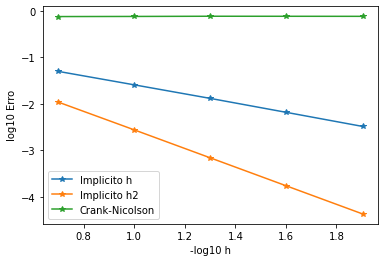

Implicito h 0.9822342919139414
Implicito h2 1.9955093543856774
Crank Nicholson -0.003933471562258907


In [ ]:
plt.clf()
plt.plot(-np.log10(refin),np.log10(erroImplicitoh1),'-*')
plt.plot(-np.log10(refin),np.log10(erroImplicito),'-*')
plt.plot(-np.log10(refin),np.log10(erroCN),'-*')
plt.legend(["Implicito h", "Implicito h2", "Crank-Nicolson"])
plt.ylabel("log10 Erro")
plt.xlabel("-log10 h")
plt.show()
print("Implicito h", (np.log10(erroImplicitoh1[er-1])-np.log10(erroImplicitoh1[0]))/(np.log10(refin[er-1])-np.log10(refin[0])))
print("Implicito h2", (np.log10(erroImplicito[er-1])-np.log10(erroImplicito[0]))/(np.log10(refin[er-1])-np.log10(refin[0])))
print("Crank Nicholson", (np.log10(erroCN[er-1])-np.log10(erroCN[0]))/(np.log10(refin[er-1])-np.log10(refin[0])))

#Questão 2 - Convecção Transiente:


Problema de convecção transiente
\begin{eqnarray}
 \dfrac{du}{dt} + κ\dfrac{du}{dx} = 0,  \ \ \ \ (x,t) \in Ω × [0,T]
\end{eqnarray}
\begin{eqnarray}
  κ > 0
\end{eqnarray}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def TDMASolve(a, b, c, d):
  nmax = len(d)#n em números é linhas

  # Modifica o primeiro coeficiente de cada linha
  c[0] /= b[0] #Risco de divisão por zero.
  d[0] /= b[0]

  for i in range(1, nmax):
    ptemp = b[i] - (a[i] * c[i-1])
    c[i] /= ptemp
    d[i] = (d[i] - a[i] * d[i-1])/ptemp

  #Substituição de volta
  x = [0 for i in range(nmax)]
  x[-1] = d[-1]
  for i in range(-2,-nmax-1,-1):
    x[i] = d[i] - c[i] * x[i+1]
  return x

In [ ]:
def exata(x,t):
  if( (x > 0 and x <= 0.2) or (x >= 0.6 and x < 0.8) ):
    return 1
  elif(x > 0.2 and x <= 0.4):
    return 4*x - 0.6
  elif(x > 0.4 and x <= 0.6):
    return -4*x + 2.6
  elif( (x >= -1 and x <= 0) or (x >= 0.8 and x <= 1) ):
    return 0

def f(x,t):
  return 0

FTCS Implícito:
$$
\dfrac{u^{n+1}_j - u^{n}_j}{Δt} + κ \dfrac{u^{n+1}_{j+1} - u^{n+1}_{j-1}}{2h} = 0
$$
$$
u^{n+1}_j - u^{n}_j + \dfrac{ρ}{2}(u^{n+1}_{j+1} - u^{n+1}_{j-1}) = 0, \ \ \ \ ρ = \dfrac{κΔt}{h}
$$
$$
- \dfrac{ρ}{2}(u^{n+1}_{j-1})  + u^{n+1}_j  +  \dfrac{ρ}{2}(u^{n+1}_{j+1}) = u^{n}_j, \ \ \ \ ρ = \dfrac{κΔt}{h}
$$

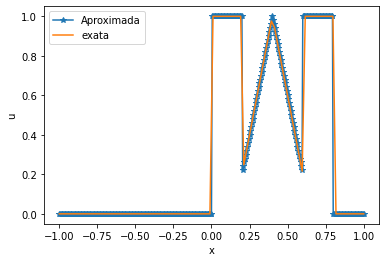

In [ ]:
nel = 400

# dominio espacial
xi = -1
xf = 1
# espaçamento entre os elementos
h = (xf-xi)/nel
h2 = h*h

#dominio temporal
ti = 0
tf = 0.15
#espaçamento temporal
dt = h/2

#coeficiente difusivo
kappa = 1
k = 1

rho = kappa*dt/2*h

x = np.linspace(xi,xf,nel+1)
uFTCS = np.zeros(nel+1)

#condicao inicial
for i in range(len(x) - 1):
  uFTCS[i] = exata(x[i],ti)
t = ti
while(t < tf):

#condicoes de contorno de Dirichlet
  uFTCS[0] = exata(x[0],t)
  uFTCS[nel] = exata(x[nel],t)

  #construcao da matriz
  a = -rho*np.ones(nel-1)
  b = np.ones(nel-1)
  c = rho*np.ones(nel-1)
  # construcao do vetor fonte 
  d = f(np.linspace(xi+h,xf-h,nel-1),t) + uFTCS[1:nel]
  # contribuicao das condicoes de contorno no termo fonte 
  d[0] = d[0] + rho*uFTCS[0]
  d[nel-2] = d[nel-2] + rho*uFTCS[nel]

  uFTCS[1:nel] = TDMASolve(a,b,c,d)
  plt.plot(x,uFTCS,"-*")
  t = t + dt

x = np.linspace(xi,xf,nel+1)
xx = np.linspace(xi,xf,100)
exataxx = np.zeros(100)

for i in range(len(xx) - 1):
  exataxx[i] = exata(xx[i],ti)

plt.clf()
plt.plot(x,uFTCS,"-*", xx,exataxx)
plt.xlabel("x")
plt.ylabel("u")
plt.legend(["Aproximada","exata"])
plt.show()


Lax Friedrichs:
$$
u^{n+1}_j = \dfrac{1}{2}(u^{n}_{j+1} + u^{n}_{j-1}) - \dfrac{ρ}{2}(u^{n}_{j+1} - u^{n}_{j-1}), \ \ \ \ ρ = \dfrac{κΔt}{h}
$$

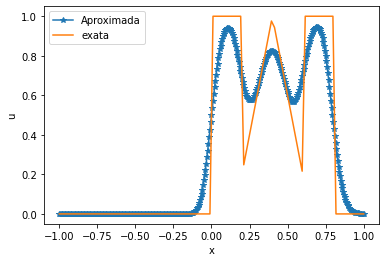

In [ ]:
nel = 400

# dominio espacial
xi = -1
xf = 1
# espaçamento entre os elementos
h = (xf-xi)/nel
h2 = h*h

#dominio temporal
ti = 0
tf = 0.15
#espaçamento temporal
dt = h/2

#coeficiente difusivo
kappa = 1
k = 1

rho = kappa*dt/2*h

x = np.linspace(xi,xf,nel+1)
uLax = np.zeros(nel+1)

#condicao inicial
for i in range(len(x) - 1):
  uLax[i] = exata(x[i],ti)
t = ti

while(t < tf):
  #condicoes de contorno de Dirichlet
  uLax[0] = exata(x[0],t)
  uLax[nel] = exata(x[nel],t)

  for j in range(1,nel-1):
    uLax[j] = 1/2*(uLax[j+1] + uLax[j-1]) - rho/2*(uLax[j+1] - uLax[j-1])
  t = t + dt

x = np.linspace(xi,xf,nel+1)
xx = np.linspace(xi,xf,100)
exataxx = np.zeros(100)

for i in range(len(xx) - 1):
  exataxx[i] = exata(xx[i],ti)

plt.clf()
plt.plot(x,uLax,"-*", xx,exataxx)
plt.xlabel("x")
plt.ylabel("u")
plt.legend(["Aproximada","exata"])
plt.show()


Upwind Explícito:
$$
u^{n+1}_j = u^{n}_j - ρ(u^{n}_{j} - u^{n}_{j-1}) , \ \ \ \ ρ = \dfrac{κΔt}{2h}, \ \ \ \ κ > 0
$$

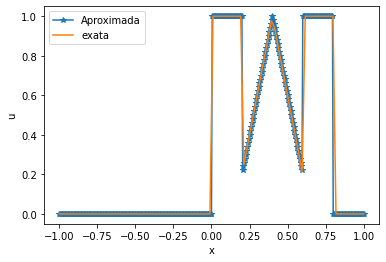

In [ ]:
nel = 400

# dominio espacial
xi = -1
xf = 1
# espaçamento entre os elementos
h = (xf-xi)/nel
h2 = h*h

#dominio temporal
ti = 0
tf = 0.15
#espaçamento temporal
dt = h/2

#coeficiente difusivo
kappa = 1
k = 1

rho = kappa*dt/2*h

x = np.linspace(xi,xf,nel+1)
uUpwind = np.zeros(nel+1)

#condicao inicial
for i in range(len(x) - 1):
  uUpwind[i] = exata(x[i],ti)
t = ti

while(t < tf):
  #condicoes de contorno de Dirichlet
  uUpwind[0] = exata(x[0],t)
  uUpwind[nel] = exata(x[nel],t)

  for j in range(1,nel-1):
    uUpwind[j] = uUpwind[j] - rho*(uUpwind[j] - uUpwind[j-1])
  t = t + dt

x = np.linspace(xi,xf,nel+1)
xx = np.linspace(xi,xf,100)
exataxx = np.zeros(100)

for i in range(len(xx) - 1):
  exataxx[i] = exata(xx[i],ti)

plt.plot(x,uUpwind,"-*", xx,exataxx)
plt.xlabel("x")
plt.ylabel("u")
plt.legend(["Aproximada","exata"])
plt.show()


Plotagem dos 3:

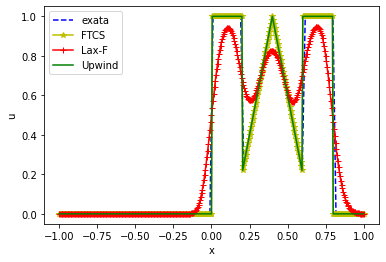

In [ ]:
plt.clf()
plt.plot(xx,exataxx,"b--",x,uFTCS,"y-*", x,uLax,"r-+", x,uUpwind,"g-")
plt.xlabel("x")
plt.ylabel("u")
plt.legend(["exata", "FTCS", "Lax-F", "Upwind"])
plt.show()

#Questão 3 - Difusão Convecção Transiente:


Problema de difusão convecção transiente
\begin{eqnarray}
 \dfrac{du}{dt}-ϵ\dfrac{d^2 u}{d x^2} + κ\dfrac{du}{dx} = 0,  \ \ \ \ (x,t) \in Ω × [0,T].
\end{eqnarray}
Solução exata:
\begin{eqnarray}
  u(x,t) = exp(-ϵt)sen(x - κt)
\end{eqnarray}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def TDMASolve(a, b, c, d):
  nmax = len(d)#n em números é linhas

  # Modifica o primeiro coeficiente de cada linha
  c[0] /= b[0] #Risco de divisão por zero.
  d[0] /= b[0]

  for i in range(1, nmax):
    ptemp = b[i] - (a[i] * c[i-1])
    c[i] /= ptemp
    d[i] = (d[i] - a[i] * d[i-1])/ptemp

  #Substituição de volta
  x = [0 for i in range(nmax)]
  x[-1] = d[-1]
  for i in range(-2,-nmax-1,-1):
    x[i] = d[i] - c[i] * x[i+1]
  return x

In [ ]:
def exata(x, t, epsilon, kappa):
  return np.exp(-epsilon*t)*np.sin(x - kappa*t)

def f(x):
  return 0

###Upwind Implícito (1 passo de tempo):
$$
\dfrac{u^{n+1}_j - u^{n}_j}{Δt} - ϵ \dfrac{u^{n+1}_{j+1} - 2u^{n+1}_j +  u^{n+1}_{j-1}}{h^2} + κ \dfrac{u^{n+1}_{j} - u^{n+1}_{j-1}}{h} = 0
$$

$$
u^{n+1}_j - σ(u^{n+1}_{j+1} - 2u^{n+1}_j +  u^{n+1}_{j-1}) + ρ(u^{n+1}_{j} - u^{n+1}_{j-1}) = u^{n}_{j}, \ \ \ \ σ = \dfrac{ϵΔt}{h^2} \ \ \ \ ρ = \dfrac{κΔt}{h}
$$

$$
-σ(u^{n+1}_{j+1}) +  u^{n+1}_{j} + 2σu^{n+1}_{j} + ρu^{n+1}_{j} -σu^{n+1}_{j-1} -ρu^{n+1}_{j-1} = u^{n}_{j}, \ \ \ \ σ = \dfrac{ϵΔt}{h^2} \ \ \ \ ρ = \dfrac{κΔt}{h}
$$

Sigma:  0.5092958178940651
Rho:  0.1
0.13926990816987242 True
Instável
tf:  1e-05
dt:  0.19634954084936207
 Cond1:  0.1755328169524702 Cond2:  1.1185916357881303
Sigma:  1.0185916357881302
Rho:  0.1
0.11963495408493621 True
Instável
tf:  1e-05
dt:  0.09817477042468103
 Cond1:  0.04593652389590019 Cond2:  2.1371832715762604
Sigma:  2.0371832715762603
Rho:  0.1
0.10981747704246811 True
Instável
tf:  1e-05
dt:  0.04908738521234052
 Cond1:  0.01175924172084545 Cond2:  4.17436654315252
Sigma:  4.074366543152521
Rho:  0.1
0.10490873852123406 True
Instável
tf:  1e-05
dt:  0.02454369260617026
 Cond1:  0.0029754499690284463 Cond2:  8.248733086305041
Sigma:  8.148733086305041
Rho:  0.1
0.10245436926061703 True
Instável
tf:  1e-05
dt:  0.01227184630308513
 Cond1:  0.0007483989400498788 Cond2:  16.397466172610084


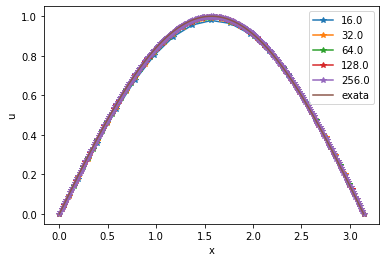

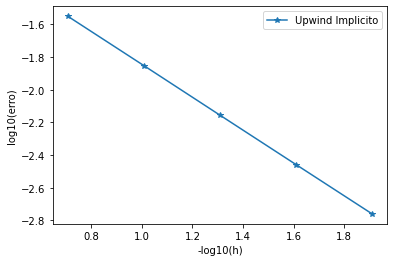

Erro:  [0.02817206 0.01405051 0.00698922 0.00348331 0.00173864]
Upwind Implícito:   1.0045590711146066
h


In [ ]:
k = 5
erro_Upwind = np.zeros(k)

refin = np.zeros(k)
vetorNel = np.zeros(k)

for l in range(0,k):

  nel = 16*(2**l)
  # dominio espacial
  xi = 0
  xf = np.pi
  # espaçamento entre os elementos
  h = (xf-xi)/nel
  h2 = h*h
  h3 = h*h*h

  #dominio temporal
  ti = 0
  tf = 0.00001
  #espaçamento temporal
  dt = h
  #coeficiente difusivo
  epsilon = 0.1
  kappa = 0.1

  sigma = epsilon*dt/h2
  rho = kappa*dt/h
  print("Sigma: ", sigma)
  print("Rho: ", rho)

  if(dt == h):
    print(2*epsilon*h + kappa, 2*epsilon*h + kappa <= 1)
  elif(dt == h2):
    print(2*epsilon + kappa*h, 2*epsilon + kappa*h <= 1)

  cond1 = h2/(2*epsilon + h*kappa)
  cond2 = 2*sigma+rho
  if(dt <= cond1 and cond2 <= 1):
    print("Estável")
    print("tf: ", tf)
    print("dt: ", dt)
    print(" Cond1: ", cond1, "Cond2: ", cond2)
  else:
    print("Instável")
    print("tf: ", tf)
    print("dt: ", dt)
    print(" Cond1: ", cond1, "Cond2: ", cond2)

  x = np.linspace(xi,xf,nel+1)
  u = np.zeros(nel+1)

  #condicao inicial
  u = exata(x, ti, epsilon, kappa)

  t = ti
  while(t < tf):

  #condicoes de contorno de Dirichlet
    u[0] = exata(x[0], ti, epsilon, kappa)
    u[nel] = exata(x[nel], ti, epsilon, kappa)

    #construcao da matriz
    #-sigma - rho
    a = -(sigma + rho)*np.ones(nel-1)
    #1 + 2sigma + rho
    #-sigma
    b = (1 + 2*sigma + rho)*np.ones(nel-1)
    c = -sigma*np.ones(nel-1) 
    # construcao do vetor fonte 
    d = f(np.linspace(xi+h,xf-h,nel-1)) + u[1:nel]

    # contribuicao das condicoes de contorno no termo fonte 
    d[0] = d[0] + (sigma - rho)*u[0]
    d[nel-2] = d[nel-2] + (sigma)*u[nel]

    u[1:nel] = TDMASolve(a,b,c,d)

    t = t + dt

  refin[l] = h
  vetorNel[l] = nel
  x = np.linspace(xi,xf,nel+1)
  xx = np.linspace(xi,xf,nel+1)
  exataxx = exata(xx, ti, epsilon, kappa)
  erro_Upwind[l] = np.max(np.abs(u - exataxx))
  plt.plot(x,u,"-*")


plt.ylabel("u")
plt.xlabel("x")
plt.plot(xx,exataxx)
plt.legend([vetorNel[0],vetorNel[1],vetorNel[2],vetorNel[3],vetorNel[4],"exata"])
plt.show()

plt.clf()
plt.plot(-np.log10(refin),np.log10(erro_Upwind),'-*')
plt.xlabel("-log10(h)")
plt.ylabel("log10(erro)")
plt.legend(["Upwind Implicito"])
plt.show() 
print("Erro: ", erro_Upwind)
print("Upwind Implícito:  ", (np.log10(erro_Upwind[k-1])-np.log10(erro_Upwind[0]))/(np.log10(refin[k-1])-np.log10(refin[0])))
if(dt == h):
  print("h")
if(dt == h2):
  print("h2")

When using an implicit method, you will introduce a large amount of diffusion thus you will smear out your solution significantly.

It can be obtained from a method-of-lines discretization by using a backward difference in space and the backward (implicit) Euler method in time. \\
It is unconditionally stable as long as u ≥ 0 (interestingly, it's also stable for u < 0 if the time step is not too small!) \\
It is more dissipative than the traditional explicit upwind scheme. \\
Unlike the explicit upwind scheme, it does not satisfy the unit CFL condition (i.e., it is not exact in the case that τu/h=1). Instead it satisfies the anti-unit CFL condition (it is exact if τu/h=−1).

###Crank-Nicholson (1 passo de tempo):
$$
\dfrac{u^{n+1}_j - u^{n}_j}{Δt} +\dfrac{1}{2}(- ϵ \dfrac{u^{n+1}_{j+1} - 2u^{n+1}_j +  u^{n+1}_{j-1}}{h^2} - ϵ \dfrac{u^{n}_{j+1} - 2u^{n}_j +  u^{n}_{j-1}}{h^2} + κ \dfrac{u^{n+1}_{j+1} - u^{n+1}_{j-1}}{2h} + κ \dfrac{u^{n}_{j+1} - u^{n}_{j-1}}{2h}) = 0
$$

$$
u^{n+1}_j - u^{n}_j +\dfrac{1}{2}(- ϵΔt \dfrac{u^{n+1}_{j+1} - 2u^{n+1}_j +  u^{n+1}_{j-1}}{h^2} - ϵΔt \dfrac{u^{n}_{j+1} - 2u^{n}_j +  u^{n}_{j-1}}{h^2} + κΔt \dfrac{u^{n+1}_{j+1} - u^{n+1}_{j-1}}{2h} + κΔt \dfrac{u^{n}_{j+1} - u^{n}_{j-1}}{2h}) = 0
$$

$$
u^{n+1}_j + (- \dfrac{σ}{2}(u^{n+1}_{j+1} - 2u^{n+1}_j +  u^{n+1}_{j-1}) - \dfrac{σ}{2}(u^{n}_{j+1} - 2u^{n}_j +  u^{n}_{j-1}) + \dfrac{ρ}{4}(u^{n+1}_{j+1} - u^{n+1}_{j-1}) + \dfrac{ρ}{4}(u^{n}_{j+1} - u^{n}_{j-1})) = u^{n}_j,\\
\ \ \ \ σ = \dfrac{ϵΔt}{h^2},\ \ \ \ ρ =\dfrac{κΔt}{h}
$$

$$
u^{n+1}_j - \dfrac{σ}{2}(u^{n+1}_{j+1} - 2u^{n+1}_j +  u^{n+1}_{j-1})  + \dfrac{ρ}{4}(u^{n+1}_{j+1} - u^{n+1}_{j-1}) = u^{n}_j + \dfrac{σ}{2}(u^{n}_{j+1} - 2u^{n}_j +  u^{n}_{j-1}) - \dfrac{ρ}{4}(u^{n}_{j+1} - u^{n}_{j-1})),\\
\ \ \ \ σ = \dfrac{ϵΔt}{h^2} \ \ \ \ ρ = \dfrac{κΔt}{h}
$$

$$
(- \dfrac{σ}{2} + \dfrac{ρ}{4})u^{n+1}_{j+1} + (1 + 2\dfrac{σ}{2})u^{n+1}_j +(- \dfrac{σ}{2} - \dfrac{ρ}{4})u^{n+1}_{j-1} = (\dfrac{σ}{2} - \dfrac{ρ}{4})u^{n}_{j+1} + (1 - 2\dfrac{σ}{2})u^{n}_j + (\dfrac{σ}{2} + \dfrac{ρ}{4})u^{n}_{j-1},\\
\ \ \ \ σ = \dfrac{ϵΔt}{h^2} \ \ \ \ ρ = \dfrac{κΔt}{h}
$$

tf:  1e-05
dt:  0.038553142191755305
Sigma:  0.5
Rho:  0.09817477042468103
0.22545630739382974
Converge
tf:  1e-05
dt:  0.009638285547938826
Sigma:  0.5
Rho:  0.04908738521234052
0.23772815369691486
Converge
tf:  1e-05
dt:  0.0024095713869847065
Sigma:  0.5
Rho:  0.02454369260617026
0.24386407684845743
Converge
tf:  1e-05
dt:  0.0006023928467461766
Sigma:  0.5
Rho:  0.01227184630308513
0.24693203842422873
Converge
tf:  1e-05
dt:  0.00015059821168654416
Sigma:  0.5
Rho:  0.006135923151542565
0.24846601921211436
Converge


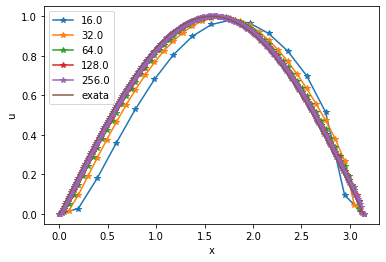

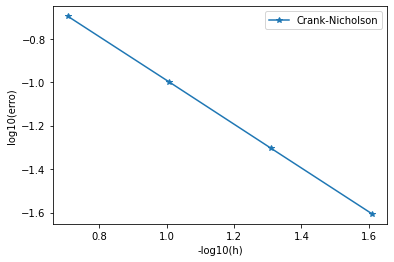

Erro:  [0.20108798 0.10018007 0.04974298 0.02475186 0.01233004]
Crank-Nicholson:   1.0068943092626048
h2


In [ ]:
k = 5
erroCN = np.zeros(k)

refin = np.zeros(k)
vetorNel = np.zeros(k)

for l in range(0,k):

  nel = 16*(2**l)
  # dominio espacial
  xi = 0
  xf = np.pi
  # espaçamento entre os elementos
  h = (xf-xi)/nel
  h2 = h*h
  h3 = h*h*h

  #dominio temporal
  ti = 0
  tf = 0.00001
  
  #espaçamento temporal
  dt = h2
  print("tf: ", tf)
  print("dt: ", dt)
  #coeficiente difusivo
  epsilon = 0.5
  kappa = 0.5

  sigma = epsilon*dt/h2
  rho = kappa*dt/h
  #se dt = h, entao sigma e epsilon/h e rho e kappa
  #se dt = h2, entao sigma e epsilon e rho e kappa*h

  print("Sigma: ", sigma)
  print("Rho: ", rho)
  print(sigma/2 - rho/4)
  if(sigma <= 1 and rho <= 2):
    print("Converge")
  else:
    print("Não Converge")

  x = np.linspace(xi,xf,nel+1)
  u = np.zeros(nel+1)

  #condicao inicial
  u = exata(x, ti, epsilon, kappa)

  t = ti
  while(t < tf):

  #condicoes de contorno de Dirichlet
    u[0] = exata(x[0], ti, epsilon, kappa)
    u[nel] = exata(x[nel], ti, epsilon, kappa)

    #construcao da matriz
    #j-1
    a = (-sigma/2 - rho/4)*np.ones(nel-1)
    #j
    b = (1 + sigma)*np.ones(nel-1)
    #j+1
    c = (-sigma/2 + rho/4)*np.ones(nel-1)
    # construcao do vetor fonte 
    d = np.zeros(nel-1)
    for i in range(1,nel-2):
      #(\dfrac{σ}{2} - \dfrac{ρ}{4})u^{n}_{j+1} + (1 - 2\dfrac{σ}{2})u^{n}_j + (\dfrac{σ}{2} + \dfrac{ρ}{4})u^{n}_{j-1}
      d[i] = (sigma/2 - rho/4)*u[i+1] + (1 - sigma)*u[i] + (sigma/2 + rho/4)*u[i-1]
    
    # contribuicao das condicoes de contorno no termo fonte 
    d[0] = d[0] + (-sigma/2 - rho/4)*u[0]
    d[nel-2] = d[nel-2] + (-sigma/2 + rho/4)*u[nel]

    u[1:nel] = TDMASolve(a,b,c,d)

    t = t + dt

  refin[l] = h
  vetorNel[l] = nel
  x = np.linspace(xi,xf,nel+1)
  xx = np.linspace(xi,xf,nel+1)
  exataxx = exata(xx, ti, epsilon, kappa)
  erroCN[l] = np.max(np.abs(u - exataxx))
  plt.plot(x,u,"-*")


plt.ylabel("u")
plt.xlabel("x")
plt.plot(xx,exataxx)
plt.legend([vetorNel[0],vetorNel[1],vetorNel[2],vetorNel[3],vetorNel[4],"exata"])
plt.show()

plt.clf()
plt.plot(-np.log10(refin[0:4]),np.log10(erroCN[0:4]),'-*')
plt.xlabel("-log10(h)")
plt.ylabel("log10(erro)")
plt.legend(["Crank-Nicholson"])
plt.show() 
print("Erro: ", erroCN)
print("Crank-Nicholson:  ", (np.log10(erroCN[k-1])-np.log10(erroCN[0]))/(np.log10(refin[k-1])-np.log10(refin[0])))
if(dt == h):
  print("h")
if(dt == h2):
  print("h2")

tf:  0.0001
dt:  0.038553142191755305
passou
tf:  0.0001
dt:  0.009638285547938826
passou
tf:  0.0001
dt:  0.0024095713869847065
passou
tf:  0.0001
dt:  0.0006023928467461766
passou
tf:  0.0001
dt:  0.00015059821168654416
passou


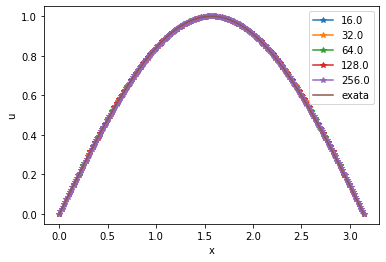

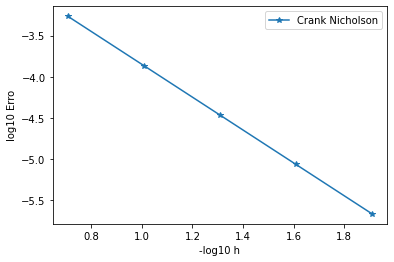

Erro: [5.44377098e-04 1.36255797e-04 3.40734320e-05 8.51893293e-06
 2.12976863e-06]
Crank-Nicholson:   1.9994414627982577
h2


In [ ]:
er = 5
erroCN = np.zeros(er)
refin = np.zeros(er)
vetorNel = np.zeros(er)

for j in range(er):

  nel = 16*(2**j)

  # dominio espacial
  xi = 0
  xf = np.pi
  # espaçamento entre os elementos
  h = (xf-xi)/nel
  h2 = h*h

  #dominio temporal
  ti = 0
  tf = 0.0001
  
  #espaçamento temporal
  dt = h2
  print("tf: ",tf)
  print("dt: ",dt)
  #coeficiente difusivo
  epsilon = 0.01
  kappa = 0.01

  sigma = epsilon*dt/h2
  rho = kappa*dt/h
  #se dt = h, entao sigma e epsilon/h e rho e kappa
  #se dt = h2, entao sigma e epsilon e rho e kappa*h

  x = np.linspace(xi,xf,nel)
  u = np.zeros(nel)

  #condicao inicial
  u = exata(x, ti, epsilon, kappa)
  t = ti
  while(t < tf):

  #condicoes de contorno de Dirichlet
    u[0] = exata(x[0],t,epsilon,kappa)
    u[nel-1] = exata(x[nel-1],t,epsilon,kappa)

    #construcao da matriz
    #A*U(N+1) = B*U(N) + f(N)
    A = np.diagflat([(-sigma/2 - rho/4) for i in range(nel-1)], -1) +\
        np.diagflat([1.+sigma/2 + rho/4]+[1.+sigma for i in range(nel-2)]+[1.+sigma/2 - rho/4]) +\
        np.diagflat([ (-sigma/2 + rho/4) for i in range(nel-1)], 1)

    B = np.diagflat([(sigma/2 + rho/4) for i in range(nel-1)], -1) +\
        np.diagflat([1.-sigma/2 - rho/4]+[1.-sigma for i in range(nel-2)]+[1.-sigma/2 + rho/4]) +\
        np.diagflat([(sigma/2 - rho/4) for i in range(nel-1)], 1)

    f = np.zeros(nel)
    u2 = np.zeros(nel)
    u2 = np.power(u,2)
    u3 = np.zeros(nel)
    u3 = np.power(u,3)
    f[0] =  (-sigma/2 - rho/4)*u[0]
    f[nel-2] = (-sigma/2 + rho/4)*u[nel-1]
    np.linalg.solve(A, B.dot(u) + f)

    t = t + dt

  refin[j] = h
  vetorNel[j] = nel
  x = np.linspace(xi,xf,nel)
  xx = np.linspace(xi,xf,nel)
  exataxx = exata(xx,t,epsilon,kappa)
  plt.plot(x[0:nel],u,"-*")
  print("passou")
  erroCN[j] = np.max(np.abs(exataxx - u))


plt.ylabel("u")
plt.xlabel("x")
plt.plot(xx,exataxx)
plt.legend([vetorNel[0],vetorNel[1],vetorNel[2],vetorNel[3],vetorNel[4],"exata"])
plt.show()
plt.clf()


plt.plot(-np.log10(refin),np.log10(erroCN),'-*')
plt.legend(["Crank Nicholson"])
plt.ylabel("log10 Erro")
plt.xlabel("-log10 h")
plt.show()
print("Erro:", erroCN)
print("Crank-Nicholson:  ", (np.log10(erroCN[k-1])-np.log10(erroCN[0]))/(np.log10(refin[k-1])-np.log10(refin[0])))
if(dt == h):
  print("h")
if(dt == h2):
  print("h2")

###FTCS Explícito:
$$
\dfrac{u^{n+1}_j - u^{n}_j}{Δt} - ϵ \dfrac{u^{n}_{j+1} - 2u^{n}_j +  u^{n}_{j-1}}{h^2} + κ \dfrac{u^{n}_{j+1} - u^{n}_{j-1}}{2h} = 0
$$


$$
u^{n+1}_j = u^{n}_j + σ(u^{n}_{j+1} - 2u^{n}_j +  u^{n}_{j-1}) - \dfrac{ρ}{2}(u^{n+1}_{j+1} - u^{n+1}_{j-1}), \ \ \ \ σ = \dfrac{ϵΔt}{h^2} \ \ \ \ ρ = \dfrac{κΔt}{h}
$$

$$
u^{n+1}_j = (σ - \dfrac{ρ}{2})u^{n}_{j+1}+ (1 - 2\sigma)u^{n}_j + (σ + \dfrac{ρ}{2})u^{n}_{j-1}, \ \ \ \ σ = \dfrac{ϵΔt}{h^2} \ \ \ \ ρ = \dfrac{κΔt}{h}
$$

Estável
Sigma:  0.01
Rho:  3.784945883825662e-05
Cond:  0.19634954084936207
Estável
Sigma:  0.01
Rho:  4.731182354782077e-06
Cond:  0.09817477042468103
Estável
Sigma:  0.01
Rho:  5.913977943477597e-07
Cond:  0.04908738521234052
Estável
Sigma:  0.01
Rho:  7.392472429346996e-08
Cond:  0.02454369260617026


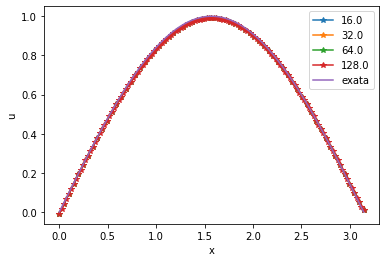

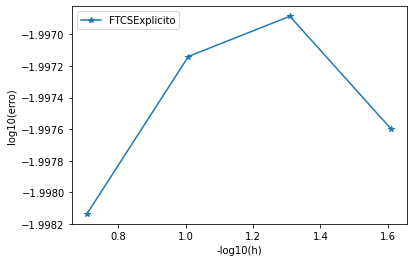

FTCS Explícito:   -0.0005948307642358072


In [ ]:
k = 4
erro_FTCSExplicito = np.zeros(k)

refin = np.zeros(k)
vetorNel = np.zeros(k)

for l in range(0,k):

  nel = 8*(2**(l+1))

  # dominio espacial
  xi = 0
  xf = np.pi
  # espaçamento entre os elementos
  h = (xf-xi)/nel
  h2 = h*h

  #dominio temporal
  ti = 0
  tf = 1
  #espaçamento temporal
  dt = h2

  #coeficiente difusivo
  epsilon = 0.01
  kappa = 0.01

  sigma = epsilon*dt/h2
  rho = kappa*dt/2*h

  cond = h*kappa/epsilon

  if(cond <= 2 and 1 >= 2*sigma and 2*sigma >= rho):
    print("Estável")
    print("Sigma: ", sigma)
    print("Rho: ", rho)
    print("Cond: ", cond)
  else:
    print("Instável")
    print("Sigma: ", sigma)
    print("Rho: ", rho)
    print("Cond: ", cond)

  x = np.linspace(xi,xf,nel+1)
  u = np.zeros(nel+1)

  #condicao inicial
  for i in range(len(x) - 1):
    u[i] = exata(x[i], ti, epsilon, kappa)
  t = ti

  while(t < tf):
    #condicoes de contorno de Dirichlet
    u[0] = exata(x[0], t, epsilon, kappa)
    u[nel] = exata(x[nel], t, epsilon, kappa)

    for j in range(1,nel-1):
      u[j] = (sigma - rho)*u[j+1] + (1 - 2*sigma)*u[j] + (sigma + rho)*u[j-1]
    t = t + dt

  x = np.linspace(xi,xf,nel+1)
  xx = np.linspace(xi,xf,nel+1)
  exataxx = np.zeros(nel+1)
  exataxx = exata(xx, ti, epsilon, kappa)
  
  refin[l] = h
  vetorNel[l] = nel
  x = np.linspace(xi,xf,nel+1)
  xx = np.linspace(xi,xf,nel+1)
  exataxx = exata(xx, ti, epsilon, kappa)
  erro_FTCSExplicito[l] = np.max(np.abs(u - exataxx))
  plt.plot(x,u,"-*")


plt.ylabel("u")
plt.xlabel("x")
plt.plot(xx,exataxx)
plt.legend([vetorNel[0],vetorNel[1],vetorNel[2],vetorNel[3],"exata"])
plt.show()

plt.plot(-np.log10(refin),np.log10(erro_FTCSExplicito),'-*')
plt.xlabel("-log10(h)")
plt.ylabel("log10(erro)")
plt.legend(["FTCSExplicito"])
plt.show() 

print("FTCS Explícito:  ", (np.log10(erro_FTCSExplicito[k-1])-np.log10(erro_FTCSExplicito[0]))/(np.log10(refin[k-1])-np.log10(refin[0])))